<font color = 'teal'>
    
# ИССЛЕДОВАНИЕ О КОМПЬЮТЕРНЫХ ИГРАХ


<div class = "alert alert-info" style = "border-color: info; border-radius: 10px"> 
<div style="border:solid teal 3px; padding: 90px">
    <font color = 'black'>

Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
        
**Что нужно сделать:**
- выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные представлены до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div class = "alert alert-info" style = "border-color: info; border-radius: 10px"> 
     <font color = 'black'>

# **Этапы анализа**

**1. Изучение файла и общей информации**
    
**2. Подготовка данных**
- Замена название столбцов
- Обработка пропусков по столбцам, преобразование в нужные типы при необходимости
- Расчет суммарных продаж во всех регионах
    
**3. Исследовательский анализ данных**. Ответы на вопросы:
- Сколько игр выпускалось в разные годы?
- Как менялись продажи по платформам? У каких платформ наибольшие суммарные продажи? 
- Какие платформы лидируют по продажам, растут или падают? 
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
- Какие жанры самые прибыльные? Выделяются ли жанры с высокими и низкими продажами?
    
**4. Составление портрета пользователя каждого региона**. Определение для пользователя каждого региона:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияние рейтинга ESRB на продажи в отдельном регионе
    
**5. Проверка гипотез**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные
    
**6. Общий вывод**
 

## Изучение файла и общей информации

Для начала нужно вывести таблицу, чтобы посмотреть на исходные данные, и затем сделать первые выводы, исходя из информации по столбцам и основным показателям по ним.

In [1]:
# Импортируем библиотеки, которые нам понадобятся
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

In [2]:
# Зададим переменную для прочтения файла и разделим колонки с помощью sep, чтобы привести данные в вид таблицы
data = pd.read_csv('/datasets/games.csv')

In [3]:
# Выведем первые пять строк таблицы
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Просмотрим данные по каждому столбцу, выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


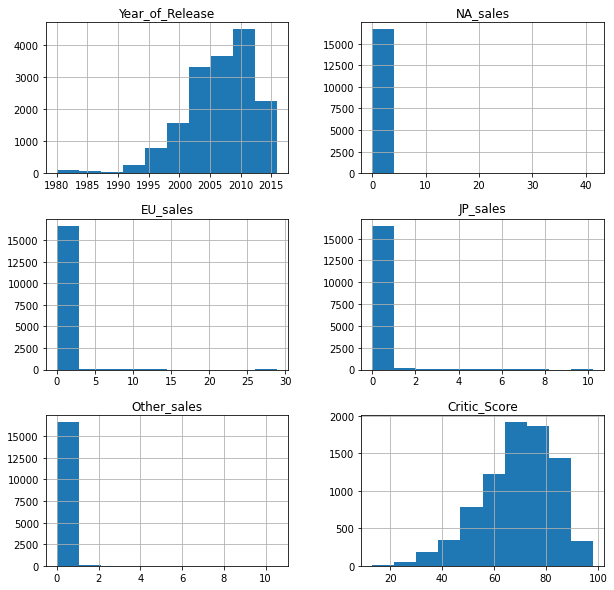

In [5]:
# Построим гистограммы для всех числовых столбцов таблицы
data.hist(figsize = (10, 10));

In [6]:
# Просмотрим основные показатели по столбцам
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<div style="border:solid teal 4px; padding: 40px">

На данном этапе мы уже можем увидеть, что нам нужно будет делать дальше непосредственно перед анализом, а именно разобраться с пропусками, которые есть в 6 столбцах, изменить в некоторых столбцах типы данных (например в user_score) и подближе рассмотреть гистограммы. Сейчас по ним мы можем увидеть некоторые тенденции заранее, например в critic_score и в year_of_release.

## Подготовка данных

<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>
        
**Что нужно сделать на этом шаге:**
    
- Заменить название столбцов
- Обработать пропуски по столбцам, преобразовать в нужные типы при необходимости
- Рассчитать суммарных продаж во всех регионах
 


### Заменим название стобцов

In [7]:
# Просмотрим какие вообще есть названия в датасете
data.columns.unique()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
# Приведем названия к одному виду: уберем прописные буквы 
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [9]:
# Проверим изменения
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработаем пропуски

In [10]:
# Узнаем, сколько всего у нас данных
len(data)

16715

In [11]:
# Найдем сколько имеется пропусков в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div style="border:solid teal 4px; padding: 40px">

Итак, пропуски обнаружены в следующих столбцах:
    
- `name` - название игры
- `year_of_release` - год выпуска
- `critic_score` - оценка критиков (по максимуму 100)
- `user_score` - оценка пользователей (по максимуму 10)
- `rating` - рейтинг по организации ESRB (ассоциация, определяющая рейтинг компьютерных игр и присваивающая им подходящую возрастную категорию)
    
Нужно разобрать столбцы по отдельности

Проверим на наличие дубликатов в таблице

In [12]:
# Ищем количество дубликатов (берем те столбцы, по которым можно определить повторения)
data.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

2

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>комментарий</b></u></font>
    <br />
    ESRB - это американская организация, которая приваивает играм возрастной рейтинг, поэтому в этом возможно и заключена наша проблема пропусков. Компания действует в Северной Америке, в то время как в Японии и в Европе могут действовать свои организации. Сгруппируем данные, чтобы посмотреть, сколько у нас данных по рейтингу продавались в каждом регионе 
    </font>
</div>


In [13]:
data.groupby('rating')['na_sales'].sum()

rating
AO         1.26
E       1292.99
E10+     353.32
EC         1.53
K-A        2.56
M        748.48
RP         0.00
T        759.75
Name: na_sales, dtype: float64

In [14]:
data.groupby('rating')['eu_sales'].sum()

rating
AO        0.61
E       710.25
E10+    188.52
EC        0.11
K-A       0.27
M       483.97
RP        0.08
T       427.03
Name: eu_sales, dtype: float64

In [15]:
data.groupby('rating')['jp_sales'].sum()

rating
AO        0.00
E       198.11
E10+     40.20
EC        0.00
K-A       1.46
M        64.24
RP        0.00
T       151.40
Name: jp_sales, dtype: float64

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>комментарий</b></u></font>
    <br />
 Стало видно, что данных рейтинга по Северной Америке больше, в Европе меньше, а в Японии совсем мало. Это объясняется тем, что в этих регионах есть свои организации, которые проставляют свои возрастные рейтинги, и они продаются соответственно больше. А так как у нас данные только по рейтингу ESRB, то данных о продажах тех или иных игр по регионам Японии и Европы будет меньше. Возможно было бы интересно проанализировать по установленным рейтингам в других странах, но пока что у нас хотя бы появилось понимание, что делать выводы только на основе превалированности рейтинга ESRB по продажам игр в наших данных не стоит. Пропуски в оценках пользователей и критиков могут объяснятся тем же фактором, однако заполнять мы их не можем, так как это не приведет к достоверности анализа

In [16]:
# Уберем дубликат
data = data.drop_duplicates(
    subset = ['name', 'platform', 'year_of_release'], keep = 'first', inplace = False, ignore_index = False
)

In [17]:
# Проверим
data.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

0

#### Столбцы critic_score и user_score

In [18]:
# Посмотрим еще раз сколько у них пропусков
# У critic_score (оценки критиков)
data['critic_score'].isna().sum()

8577

In [19]:
# У user_score (оценки пользователей)
data['user_score'].isna().sum()

6700

От общего числа данных (16715) они составляют довольно внушительную часть, практически 50 и 40 процентов. Эти пропуски лучше оставить и не заполнять другими значениями, так как для разных платформ они могут сильно отличаться. При дальнейшем анализе будем использовать срез данных.

In [20]:
# Узнаем, какие есть уникальные значения в столбце оценки пользователей
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных кроме самих оценок и nan есть  tbd. Скорее всего это от "to be done/decided", то есть пока оценки нет, будет лучше объединить их с nan

In [21]:
# Изменим тип данных в user_score на float (так как эти значения нужны будут нам дальше для анализа)
# и с помощью параметра errors поменям tbd на nan
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [22]:
# Проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


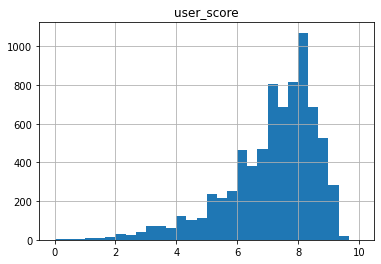

In [23]:
# Построим гистограмму для user_score
data.hist('user_score', bins = 30, range = (0,10));

(3.0, 10.0)

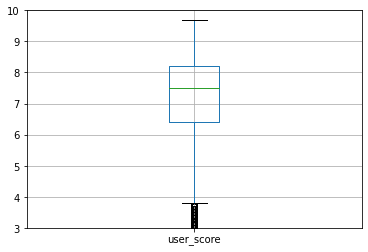

In [24]:
# Построим диаграмму размаха
data.boxplot('user_score');
plt.ylim(3, 10)

Все-таки большинство пользователей ставят доволньо высокие оценки - если смотреть на на график, то видно, что медиана находится между 7 и 8, значит половина пользователей из наших данных дали такую оценку выше 7.5, а другая половина поставила ниже. Выбросы, то есть редкие по сравнению с другими зачениями оценки, начинаются ниже 4. Все же не всем какие-то игры пришлись по вкусу, возможно дело в субъективной оценке? Можно посмотреть на оценки критиков.

Теперь посмотрим на critic_score (оценку критиков)

In [25]:
# Узнаем, какие есть уникальные значения в столбце оценки пользователей
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

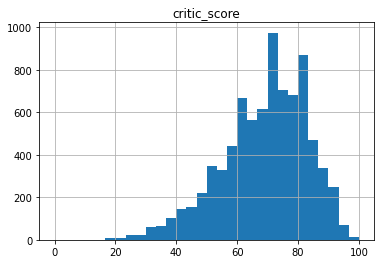

In [26]:
# Построим гистограмму для 
data.hist('critic_score', bins = 30, range = (0,100));

(20.0, 100.0)

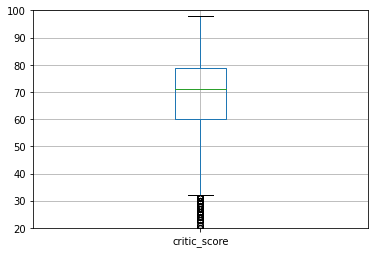

In [27]:
# Построим диаграмму размаха
data.boxplot('critic_score');
plt.ylim(20, 100)

Критики в целом солидарны с пользователями. Пользователи проставляли оценки от 0 до 10, а критик от 0 до 100. По диаграмме размаха мы видим где находится медиана - чуть больше 70 баллов, значит половина критиков решила поставить оценку выше этого значения. Выбросы начинаются примерно чуть выше 30 оценки, примерно как и у пользователей. Возможно в каких-то играх критики и пользователи были солидарны в низкой оценке.

#### Столбцы name и genre

In [28]:
# Найдем сколько имеется пропусков на данном этапе
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Скорее всего один пропуск в названии и в жанре стоят в одной строке, можем это выяснить

In [29]:
# Находим пропуск в столбце названий
data.loc[data['name'].isna(), 'name']

659    NaN
Name: name, dtype: object

In [30]:
# Находим пропуск в столбце жанров
data.loc[data['genre'].isna(), 'genre']

659    NaN
Name: genre, dtype: object

Да, строка общая, в целом можем ее убрать из обещй таблицы

In [31]:
# Убираем пропуски в столбцах name и genre
data = data.dropna(subset = ['name', 'genre'])

In [32]:
# Проверятем
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

#### Столбец year_of_release - год выпуска

In [33]:
# Узнаем, какие есть значения в столбце года выпуска
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     652
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [34]:
data['year_of_release'].min()

1980.0

In [35]:
data['year_of_release'].max()

2016.0

Значит промежуток в наших данных составляет от 1980 до 2016 года. Интересно, что пик выпуска игр приходится на 2008 год, а в 2016 году игр выпусили почти в три раза меньше.

In [36]:
 # Посмотрим сколько пропусков в столбце года выпуска игр
data['year_of_release'].isna().sum()

269

Пропуски в данном столбце составляют примерно 1.6% от общего количества данных. Поэтому, для удобства, можем их убрать

In [37]:
# Убираем пропуски 
data = data.dropna(subset = ['year_of_release'])

In [38]:
# Проверяем
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

#### Столбец rating - рейтинг по организации ESRB       

In [39]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Интересно узнать, что подразумевают эти категориальные значения.
- E - Подходит для всех возрастных категорий. 
- M - Подходит для лиц старше 17 лет. 
- T - Подходит для лиц старше 13 лет.
- E10+ - Подходит для лиц старше 10 лет.  
- AO - Подходит для взрослых старше 18 лет.
- EC - Подходит для детей от 3 лет.
- RP - Категория ещё не присвоена.
- K-A - Подходит для всех возрастных категорий. Если верить интернету, то рейтинга K-A больше не существует и теперь он называется E. Тогда нужно игры с этим рейтингом в нашем датасете объединить с данным рейтинга E.

In [40]:
# Поменяем рейтинг K-A на E
data['rating'] = data['rating'].replace('K-A', 'E')

In [41]:
# Проверяем
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

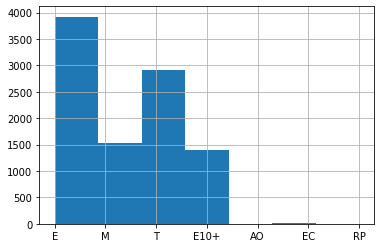

In [42]:
data['rating'].hist(bins = 7);

По графику мы видим, что игр с рейтингом AO, EC и RP слишком мало по сравнению с другими, больше всего игр с категорией E - то есть для всех возарстных категорий, но у нас еще есть пропуски

Так как RP в нашем случае это данные, которым возрастная категория еще не присвоена, то можем пропуски по рейтингу объединить с RP. Есть еще вероятность, что при заполнении не знали о данном варианте рейтинга, и поэтому не заполнили данные.

In [43]:
# Меняем пропуски на рейтинг RP
data['rating'] = data['rating'].fillna('RP')

In [44]:
# Проверяем
data['rating'].value_counts()

RP      6677
E       3923
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

Данных по рейтингу EC и AO чересчур мало по сравнению с другими, и поэтому, чтобы сделать сбалансировать анализ, лучше их не брать в расчет

In [45]:
# Убераем данные с рейтингом EC и AO
data = data.loc[(data['rating'] != 'EC') & (data['rating'] != 'AO')]

In [46]:
# Проверяем
data['rating'].value_counts()

RP      6677
E       3923
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

### Расчет суммарных продаж во всех регионах

In [47]:
# Создаем общий столбец по сумме во всех регионах
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [48]:
# Проверям
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>комментарий</b></u></font>
    <br />
     В данном подразделе мы суммировали продажи во всех регонах по каждой игре, чтобы затем мы смогли проанализировать какими были продажи в общем по платформам, жанрам и годам

## Исследовательский анализ данных

<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>

**Что нужно узнать на этом шаге:**

- Сколько игр выпускалось в разные годы?
- Как менялись продажи по платформам? У каких платформ наибольшие суммарные продажи? 
- Какие платформы лидируют по продажам, растут или падают? 
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
- Какие жанры самые прибыльные? Выделяются ли жанры с высокими и низкими продажами?

### Сколько игр выпускалось в разные годы?

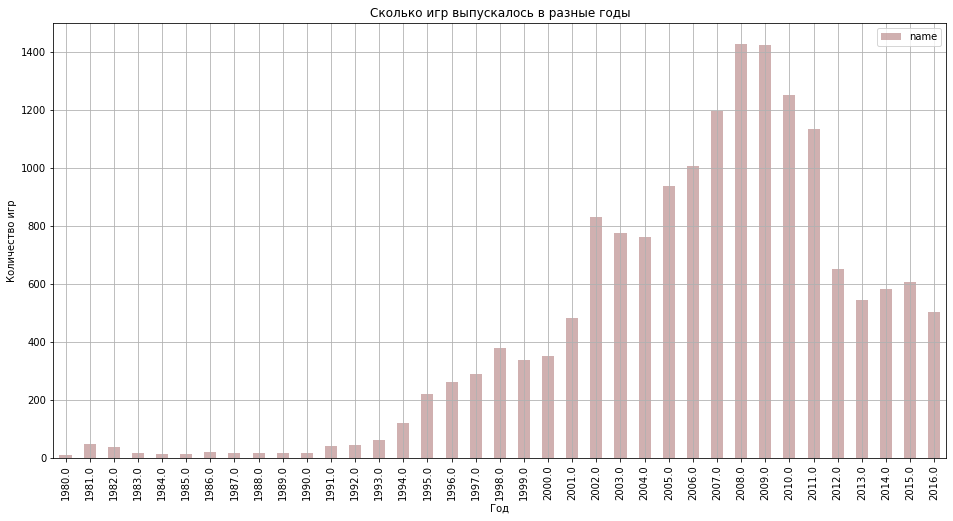

In [49]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(
    kind = 'bar',
    title = ('Сколько игр выпускалось в разные годы'),
    ylim = (0, 1500),
    xlim = (0, 40),
    alpha = 0.7,
    grid = True,
    color = 'rosybrown',
    figsize = (16,8)
);
plt.xlabel("Год"),
plt.ylabel("Количество игр")
plt.show()

Практически 10 лет с 1980 не наблюдалось никаких изменений по выпуску игр, но дальше сфера начала развиваться, это знают все, и на графики также видно, что с 90х годов пошел такой довольно резкий скачок и быстро дошел своего пика в 2008 году, далее произошел такой де резкий скачок, но уже вниз, возможно это произошло из-за роста популярности мобильных игр. Я бы не рассматривала график до 2001 года (2001 год - чтобы показать скачок вверх). А в качестве актуального интервала для дальнешйего прогноза на 2017 лучше взять последние несколько лет - с 2012 по 2016.

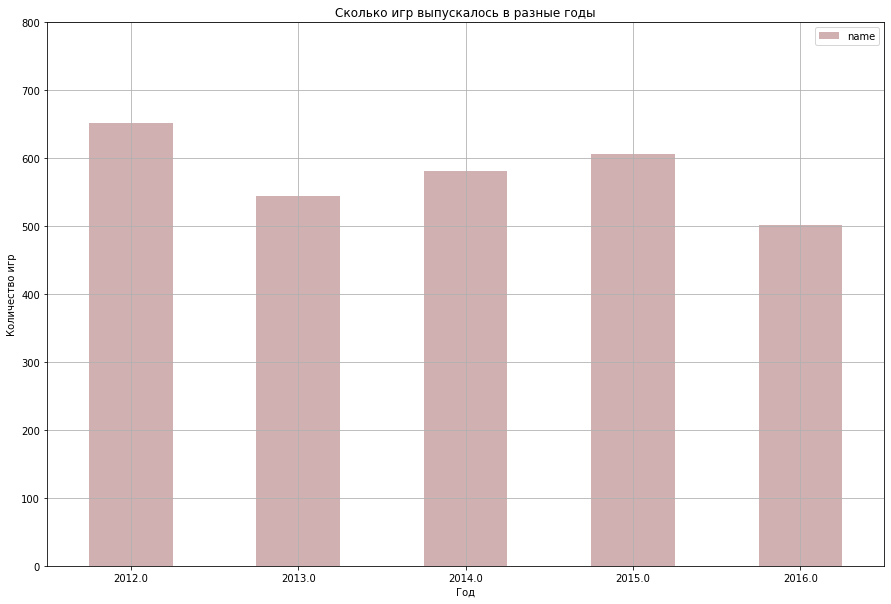

In [50]:
# Построим тот же график, но уже в рамках актуальных лет (с 2012 по 2016)
act_years = data.query('year_of_release >= 2012')
act_years.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(
    kind = 'bar',
    title = ('Сколько игр выпускалось в разные годы'),
    ylim = (0, 800),
    xlim = (0, 15),
    alpha = 0.7,
    grid = True,
    color = 'rosybrown',
    figsize = (15,10)
);
names = ('2012', '2013', '2014', '2015', '2016')
plt.ylabel("Количество игр")
plt.xlabel("Год")
plt.xticks(rotation = 0)
plt.ylabel("Количество игр")
plt.show()

### Как менялись продажи по платформам? У каких платформ наибольшие суммарные продажи? Какие платформы лидируют по продажам, растут или падают? 

Посмотрим как менялись продажи по платформам в актуальные года (2012-2016)

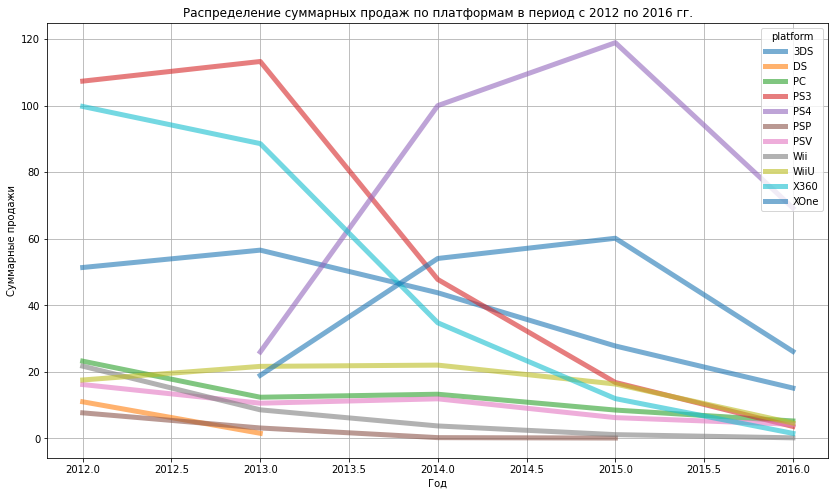

In [51]:
act_years.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum').plot(
    figsize = (14,8),
    alpha = 0.6,
    grid = True,
    linewidth = 5
)
plt.title("Распределение суммарных продаж по платформам в период с 2012 по 2016 гг.")
plt.xlabel("Год"),
plt.ylabel("Суммарные продажи")
plt.show()

Можно увидеть особенные пики у PS3 и PS4, PS4 достигла максимального пика и обогнала остальные платформа за два года, в то время как предыдущий лидер PS3 резко начал падать в продажах. Это логично, ведь это тот же PS3, только модифицированнее и интереснее. Рост к 2016 ни у одной платформы не наблюдается

Посмотрим получше на распределение платформ между собой в актульаные года

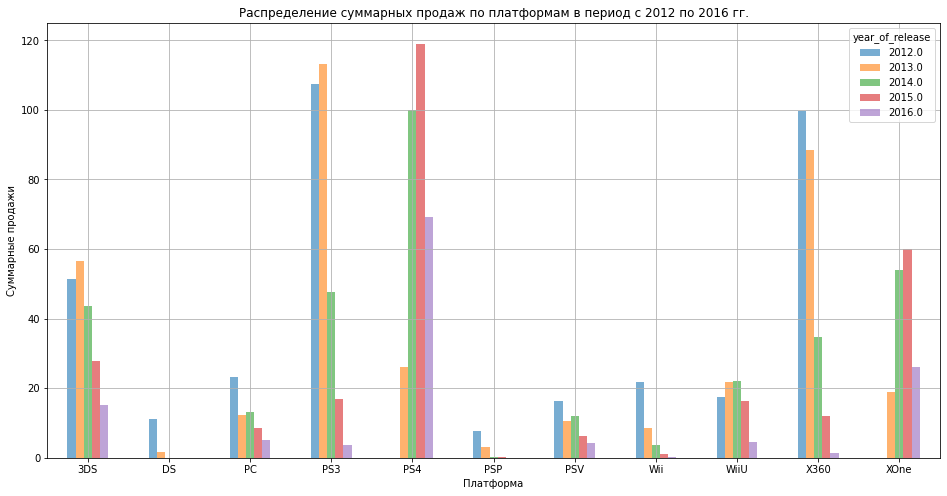

In [52]:
act_years.pivot_table(index = 'platform', columns = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(
    kind = 'bar',
    figsize = (16,8),
    alpha = 0.6,
    ylim = (0, 125),
    xlim = (0, 25),
    grid = True,
    linewidth = 4
)
plt.title("Распределение суммарных продаж по платформам в период с 2012 по 2016 гг.")
plt.xlabel("Платформа")
plt.xticks(rotation = 0)
plt.ylabel("Суммарные продажи")
plt.show()

PS3 и PS4 все также выделяются, однако на этом графике стало лучше видно следующие за ними платформы, например, на третьем месте мы уже видим находится X360

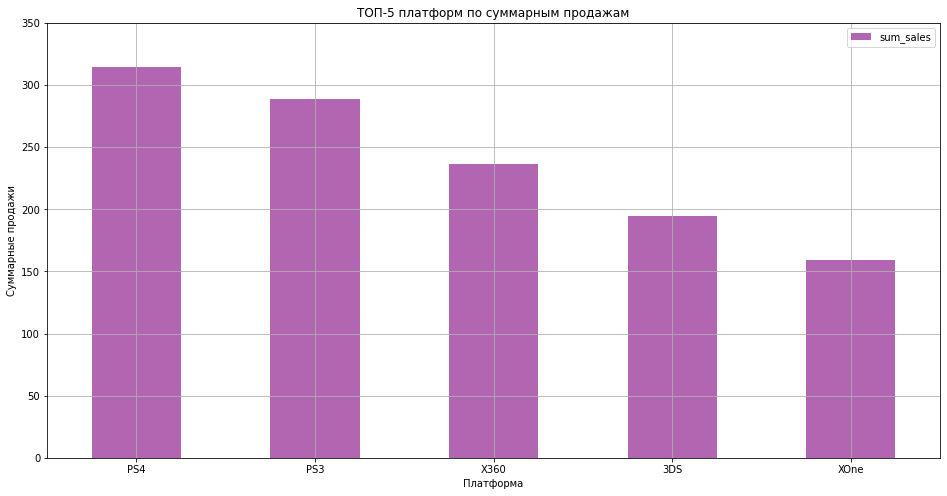

In [53]:
top_platforms = act_years.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')
top_platforms.sort_values(by = 'sum_sales', ascending = False).head(5).plot(
    kind = 'bar',
    figsize = (16,8),
    alpha = 0.6,
    ylim = (0, 350),
    xlim = (0, 25),
    grid = True,
    color = 'purple',
    linewidth = 4
)
plt.title("ТОП-5 платформ по суммарным продажам")
plt.xlabel("Платформа")
plt.xticks(rotation = 0)
plt.ylabel("Суммарные продажи")
plt.show()

На этом графике мы видим лидеров по суммарным продажам по регионам, как мы раньше уже упоминали это PS4, PS3, X360, но теперь мы еще видим 3OS и XOne

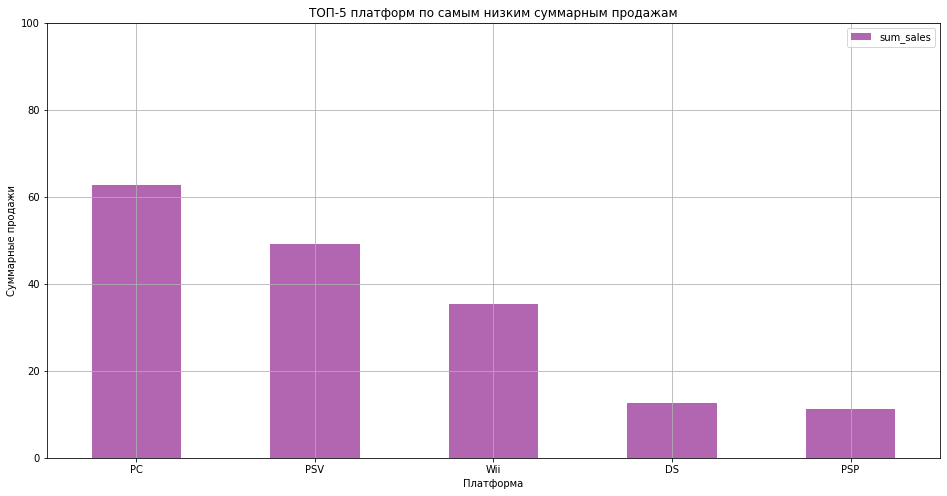

In [72]:
top_platforms = act_years.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')
top_platforms.sort_values(by = 'sum_sales', ascending = False).tail(5).plot(
    kind = 'bar',
    figsize = (16,8),
    alpha = 0.6,
    ylim = (0, 100),
    xlim = (0, 25),
    grid = True,
    color = 'purple',
    linewidth = 4
)
plt.title("ТОП-5 платформ по самым низким суммарным продажам")
plt.xlabel("Платформа")
plt.xticks(rotation = 0)
plt.ylabel("Суммарные продажи")
plt.show()

А здесь расположены платформы с самыми низкими суммарными продажами по регионам, PSP на первом месте по наименьшим суммарным продажам, немного лучше него идет DS, но судя по тенденции все равно догоняет

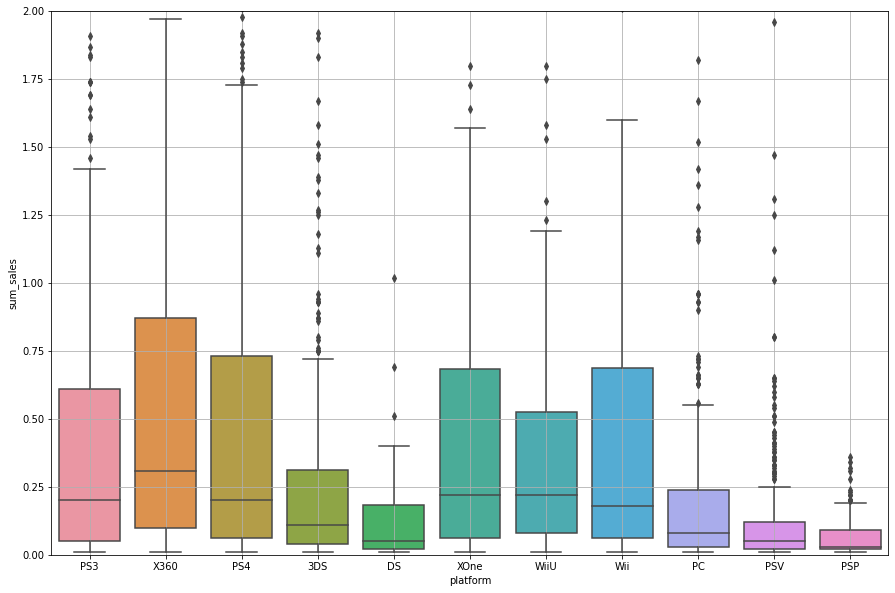

In [55]:
# Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам
plt.figure(figsize = (15, 10))
sns.boxplot (x = act_years['platform'], y = act_years['sum_sales'])
plt.grid(True)
plt.ylim(0, 2)
plt.show()

Интресно, что наибольший размах в данном случае имеет платформа X360, как и наибольшую медиану - больше 25 миллионов проданных копий, то есть одна половина всех данных по этой платформе находится за этим числом. Достаточный размах по этому графику мы видим еще у XOne и Wi, но на графике с лидерами они не на первых местах, значит у них не так много выбросов

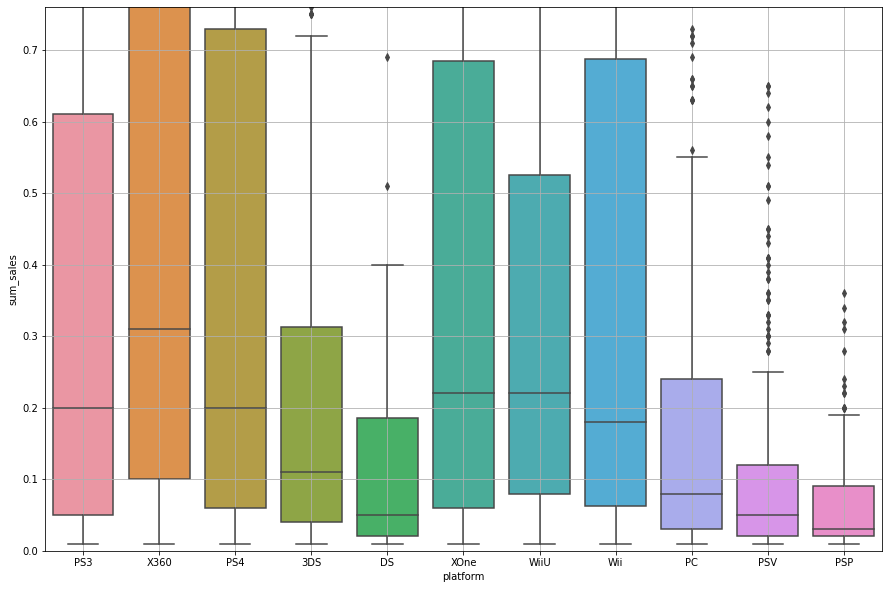

In [56]:
# Построим более приближенный "ящик с усами" по глобальным продажам игр в разбивке по платформам
plt.figure(figsize = (15, 10))
sns.boxplot (x = act_years['platform'], y = act_years['sum_sales'])
plt.grid(True)
plt.ylim(0, 0.76)
plt.show()

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>комментарий</b></u></font>
    <br />
   Теперь, когда мы отрегулировали график, нам стала лучше видна нижняя, или лучше сказать основная часть, куда входит главный массив продаж. На это графике заметна одинаковая медиана у двух лидеров продаж - PS4 и PS3, однако тем не менее у PS4 больше межквартильный размах, то есть у PS4 не так плотно сгруппированы данные по продажам и диапазон шире.</font>
</div>


### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

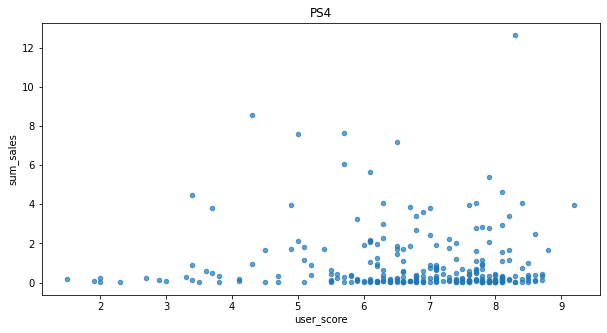

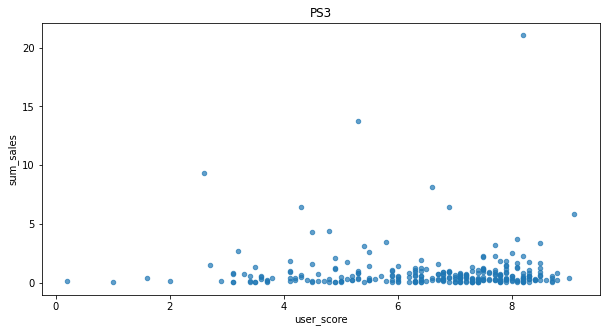

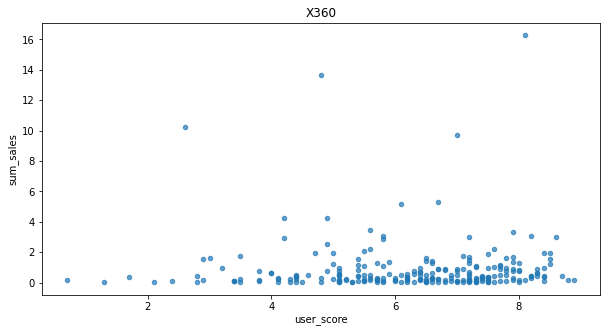

In [57]:
# Отберем три самые популярные платформы (благодаря предыдущим шагам) посмторим графики зависимости продаж от отзывов пользователей
top_three = ['PS4', 'PS3', 'X360']
for d in top_three:
    choose = act_years[act_years['platform'] == d]
    choose.plot(
    kind = 'scatter',
    figsize = (10,5),
    alpha = 0.7,
    x = 'user_score',
    title = d,
    y = 'sum_sales',       
)

In [58]:
# Найдем корреляцию для PS4 между продажами и отызвами пользователей
data_new = data.loc[data['year_of_release'] >= 2012]
number_one = data_new[data['platform'] == 'PS4']
number_one['sum_sales'].corr(number_one['user_score'])

-0.031957110204556376

In [59]:
# Найдем корреляцию для PS3 между продажами и отзывами пользователей
number_two = data_new[data['platform'] == 'PS3']
number_two['sum_sales'].corr(number_two['user_score'])

-0.006205767686051522

In [60]:
# Найдем корреляцию для X360 между продажами и отызвами пользователей
number_three = data_new[data['platform'] == 'X360']
number_three['sum_sales'].corr(number_three['user_score'])

0.0061639786462133256

Итог: Корреляция между продажами и отызвами пользователей у всех троих платформ-лидеров практически отсутствует. Ближе всего зависимость у PS4, но она ближе по сравнению с другими двумя платфомами, корреляция все равно очень низкая

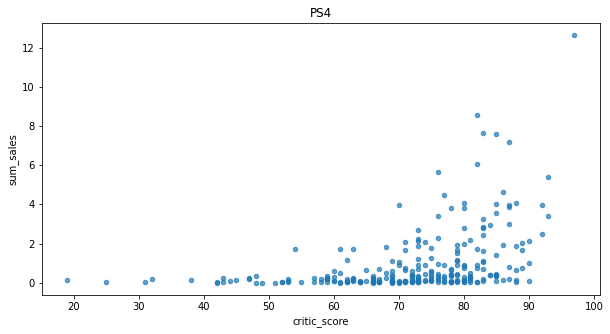

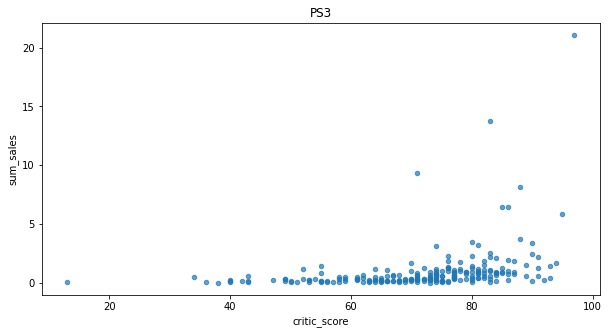

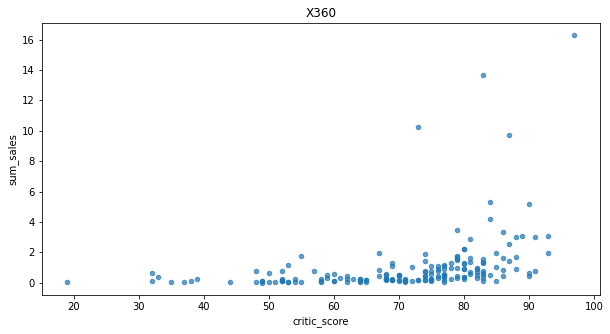

In [61]:
# Отберем три самые популярные платформы (благодаря предыдущим шагам) посмторим графики зависимости продаж от отзывов критиков
top_three = ['PS4', 'PS3', 'X360']
for d in top_three:
    choose = act_years[act_years['platform'] == d]
    choose.plot(
    kind = 'scatter',
    figsize = (10,5),
    alpha = 0.7,
    x = 'critic_score',
    title = d,
    y = 'sum_sales',      
)

In [62]:
# Найдем корреляцию для PS4 между продажами и отызвами критиков
number_one['sum_sales'].corr(number_one['critic_score'])

0.406567902061781

In [63]:
# Найдем корреляцию для PS3 между продажами и отызвами критиков
number_two['sum_sales'].corr(number_two['critic_score'])

0.3341517575509856

In [64]:
# Найдем корреляцию для X360 между продажами и отызвами критиков
number_three['sum_sales'].corr(number_three['critic_score'])

0.36057348885073365

Итог: здесь ситуация уже получше, чем у зависимости от отзывов пользователей, но все равно нельзя выделить явную положительную корреляцию. В данном случае ближе всех по зависимости продаж от отзывов PS4 - корреялция составляет 0.4, это не мало, тенденция прослеживается, но она средняя.

### Какие жанры самые прибыльные? Выделяются ли жанры с высокими и низкими продажами?

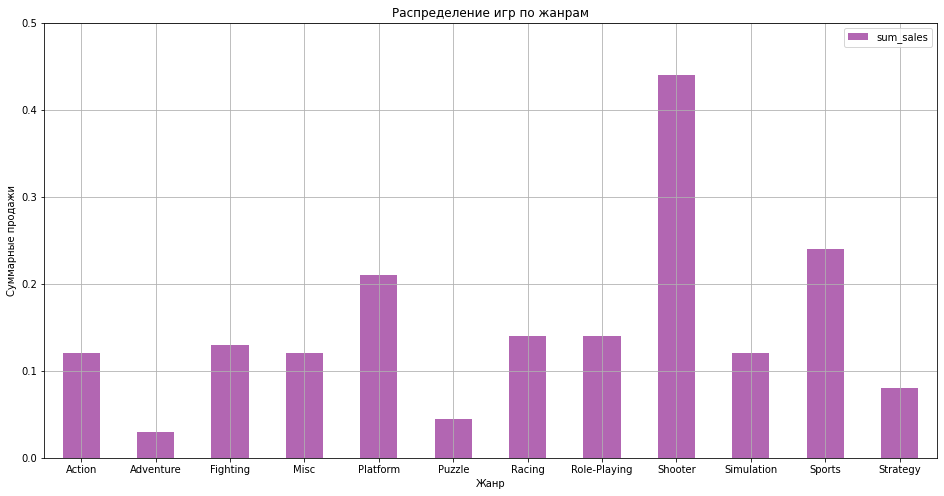

In [65]:
data_new.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'median').plot(
kind = 'bar',
    figsize = (16,8),
    alpha = 0.6,
    ylim = (0, 0.5),
    xlim = (0, 24),
    grid = True,
    color = 'purple',
    linewidth = 4
)
plt.title("Распределение игр по жанрам")
plt.xlabel("Жанр")
plt.xticks(rotation = 0)
plt.ylabel("Суммарные продажи")
plt.show()


Самым популярным жанром является shooter, то есть стрельба, такие жанры всегда покупались чаще других, поэтому не удивительно что здесь они на первом месте. На втором месте спортивные игры и игры на платформах. А вот самыми непопулярными являются стртегии, пазлы и приключения. В наших данных записан на одну игру один жанр, однако многие игры могут вмещать в себя несколько жанров одновременно, было бы интересно посмореть на распределение по сочетаниям жанрров.

## Составление портрета пользователя каждого региона

<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>
        
**Что нужно сделать на этом шаге:**
        
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияние рейтинга ESRB на продажи в отдельном регионе

Построим сначала распределения по самым популярным платформам в каждом регионе

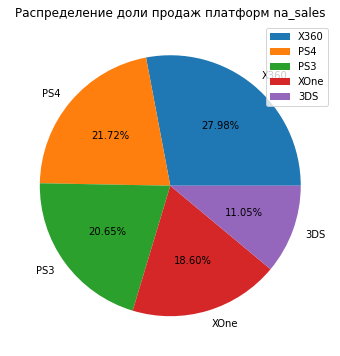

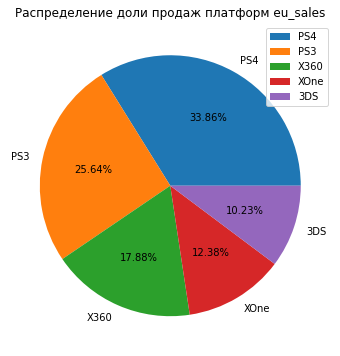

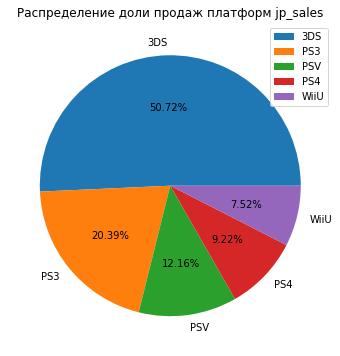

In [66]:
for elem in ['na_sales', 'eu_sales', 'jp_sales']:
    data_new.groupby(by = 'platform').agg({elem : 'sum'}).sort_values(by = elem, ascending = False).head(5).plot(
        kind = 'pie',
        subplots = True,
        figsize = (8,6),
        autopct = '%1.2f%%'
    )
    plt.ylabel("")
    plt.title(f'Распределение доли продаж платформ {elem}')
    plt.show()

В каждом регионе самая популярная платформа различается. В Северной Америке отдает предпочтнение X360, в Европе - PS4, в Японии - 3DS, причем если смотреть на доли, то в Японии чуть больше половины предпочитают 3DS, в то время как в других регионах нет настолько большой доли продаж у их самой популярной платформы.

Теперь построим распределения по самым популярным жанрам в каждом регионе

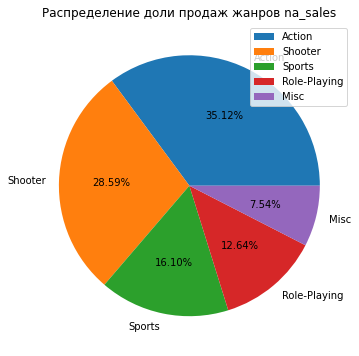

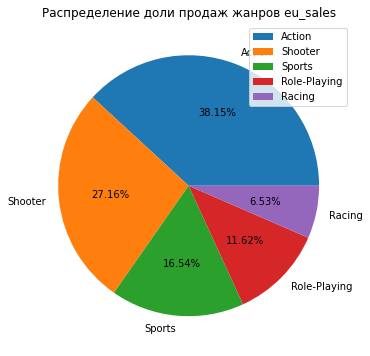

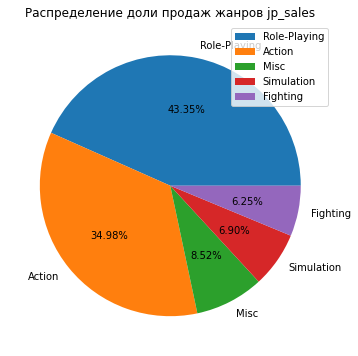

In [67]:
for elem in ['na_sales', 'eu_sales', 'jp_sales']:
    data_new.groupby(by = 'genre').agg({elem : 'sum'}).sort_values(by = elem, ascending = False).head(5).plot(
        kind = 'pie',
        subplots = True,
        figsize = (8,6),
        autopct = '%1.2f%%'
    )
    plt.ylabel("")
    plt.title(f'Распределение доли продаж жанров {elem}')
    plt.show()

Жанр Action выигрывает в Северной Америке и в Европе, а в Японии побеждает Role-Playing, хотя Action не сильно отстал - 24.9% против 43.35%

Влияние рейтинга ESRB на продажи в отдельном регионе

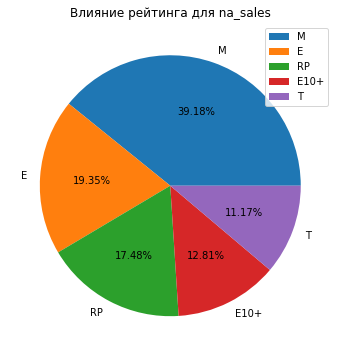

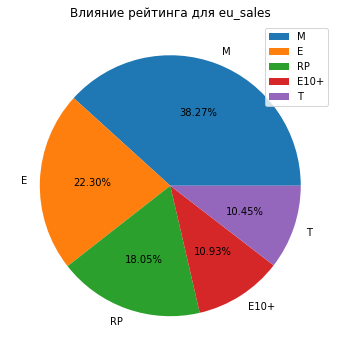

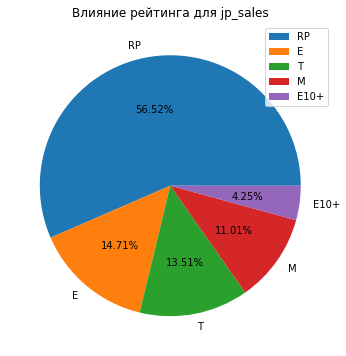

In [68]:
for elem in ['na_sales', 'eu_sales', 'jp_sales']:
    data_new.groupby(by = 'rating').agg({elem : 'sum'}).sort_values(by = elem, ascending = False).head(5).plot(
        kind = 'pie',
        subplots = True,
        figsize = (8,6),
        autopct = '%1.2f%%'
    )
    plt.ylabel("")
    plt.title(f'Влияние рейтинга для {elem}')
    plt.show()

Рейтинг M (старше 17 лет) популярнее в Северной Америке и в Европе, а в Японии - RP. 

**Итог**
- В Северной Америке: X360, Action, M
- В Европе: PS4, Action, M
- В Японии: 3DS, Role-Playing, RP

## Проверка гипотез

<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>

- Средние пользовательские рейтинги платформ XOne и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

Проверка гипотезы: средние пользовательские рейтинги платформ XOne и PC одинаковые

- H_0: средние пользовательские рейтинги платформ XOne = средние пользовательские рейтинги платформ PC
- H_1: средние пользовательские рейтинги платформ XOne ≠ средние пользовательские рейтинги платформ PC

Исходя из гипотезы мы выявили нулевую и альтернативные гипотезы. Нулевая гипотеза всегла говорит нам о равенстве, когла альтернативная ей противопоставляет. 

In [69]:
# Уберем пропуски для анализа
data_new = data_new.dropna(subset = ['user_score'])
# results - вызов метода для проверки гипотезы
XOne = data_new.loc[data_new['platform'] =='XOne']['user_score']
PC = data_new.loc[data_new['platform'] =='PC']['user_score']
results = st.ttest_ind(XOne, PC, equal_var = False) # Берем такой метод, так как совокупности не зависят друг от друга
# alpha - значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Значит, средние пользовательские рейтинги платформ XOne и средние пользовательские рейтинги платформ PC одинаковые

Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

- H_0: средние пользовательские рейтинги жанров Action = средние пользовательские рейтинги жанров Sports 
- H_1: средние пользовательские рейтинги жанров Action ≠ средние пользовательские рейтинги жанров Sports 

In [70]:
# results - вызов метода для проверки гипотезы
Action = data_new.loc[data_new['genre'] =='Action']['user_score']
Sports = data_new.loc[data_new['genre'] =='Sports']['user_score']
results = st.ttest_ind(Action, Sports, equal_var = False)
# alpha - значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.989458066467418e-20
Отвергаем нулевую гипотезу


Значит, средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

Мы проанализировали данных о компьютерных играх, просмотрели их распределение продаж по годам, жанрам, регионам и можем прорезюмировать:
- Лидерами по продажам являются платформы PS4, PS3, X360, 3DS и XOne
- Самыми непродаваемыми платформами являются PC, PSV, Wi, DS и PSP
- Практически 10 лет с 1980 не наблюдалось никаких изменений по выпуску игр, но дальше сфера начала развиваться и с 90х годов произошел резкий скачок, который ьыстро дошел до пика в 2008 году, далее произошел такой де резкий скачок, но уже вниз, возможно это произошло из-за роста популярности мобильных игр. В качестве актуального интервала для дальнешйего прогноза на 2017 лучше взять последние несколько лет - с 2012 по 2016.
- В Северной Америке популярной платформой является X360, жанром - Action, возрастным рейтингом - M
- В Европе популярной платформой является PS4, жанром - Action, возрастным рейтингом - M
- В Японии популярной платформой является 3DS,  - Role-Playing, возрастным рейтингом - RP
- По итогам проверки гипотез мы выявили, что средние пользовательские рейтинги платформ XOne и средние пользовательские рейтинги платформ PC одинаковые, а также, что средние пользовательские рейтинги жанров Action и Sports разные
- Самым популярным жанром является shooter, то есть стрельба, такие жанры всегда покупались чаще других, поэтому не удивительно что здесь они на первом месте. На втором месте спортивные игры и игры на платформах. А вот самыми непопулярными являются стртегии, пазлы и приключения. В наших данных записан на одну игру один жанр, однако многие игры могут вмещать в себя несколько жанров одновременно, было бы интересно посмореть на распределение по сочетаниям жанров.
- К сожалению в данных есть пропуски, и в некоторых столбцах они доходят до половины всего количества, для дальнейшего анализа было бы отлично восполнить пользовательские оценки и возрастные рейтинги.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>комментарий</b></u></font>
    <br />
Что касается стратегии на 2017 год, то важно обратить внимание на следующие моменты:
Если смотреть по регионам, то можно сделать акцент на популярных жанрах и платформах, например в Северной Америке популярной платформой является X360, игры для такой платформы продаются больше остальных, самыми продаваемыми жанрами игр является жанр Action. По Европе нужно взять во внимание популярность платформы PS4, и соответсвенно всех игр для этой платформы, популярным жанром также является Action, поэтому стоит просмотреть и увеличить продажи игр именно этого жанра.  В Японии популярной платформой является 3DS, а жанр уже отличается - Role-Playing самый популярный жанр в Японии, однако не стоит откладывать игры Action, так как они не сильно отстают по продажам в Японии, разница буквально 9%. Говоря об оценках пользователей и критиков, а также о рейтинге ESRB, то их можно взять за основу выбора стратегии продаж, но скорее всего только в Северной Америке они будут действительно полезны, по другим регионам нужно смотреть их рейтинги.
    <font color='4682B4'>